Top best 3 features and how you find it
>SHOT_CLOCK, SHOT_DIST, CLOSE_DEF_DIST <br />
>Two ways to select the feature: random forest, LASSO <br />
>LASSO's features are applied since it generates higher accuracy score generally<br />
>To find the LASSO's features, sweep the alpha value until 3 features areseparated<br />

How you evaluate your model?
>accuracy_score in sklearn

All models you have tried and the result
>Linear regression, Polynomial features(degree =2~7)  (train/valid = 0.623/0.632)<br /> 
>random forest(train/valid = 1.0/0.56)<br /> 
>LinearSVM in sklearn (C=0.01)  (train/valid = 0.612/0.624)
>Gradient boost(randomstate= 10)(train/valid= 0.628/0.624)


Plot the learning curve of your best model and tell if it is over-fit or not
> The model becomes overfitting after the polynomial degree exceed 6 <br />
> since the validation error increases while the training error decreases after degree>6

A brief report what you do in this assignment
>1.Load dataset <br />
>2.Standardize and split the dataset into training and validation set <br />
>3.Select 3 features using LASSO <br />
>4.Eliminate outlier using RANSAC <br />
>5.Try linearRegression model using polynomial features <br />
>6.Predict y by rounding the output
>7.Select the degree with the best performance on validation set (degree=6) <br />


In [474]:
# load data, standardize , split training and testing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression



X = pd.read_csv('./data/nba/X_train.csv')
Y = pd.read_csv('./data/nba/y_train.csv')
sc = StandardScaler()
sc.fit(X)

X_train_std = sc.transform(X)

X_t = pd.read_csv('./data/nba/X_test.csv')
sc.fit(X_t)
X_test = sc.transform(X_t)

print(X.shape)
print(X.columns)

(52399, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')


In [475]:
# Random forest feature select
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=100, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

print(X.columns.values[indices[:3]])


C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


['SHOT_DIST' 'GAME_CLOCK' 'SHOT_CLOCK']


In [448]:
forest.fit(X_train[:,indices[:3]], y_train)
y_pred = forest.predict(X_train[:,indices[:3]])
print('Train Accuracy: %.2f' % accuracy_score(y_pred, y_train))
y_pred = forest.predict(X_valid[:,indices[:3]])
print('Valid Accuracy: %.2f' % accuracy_score(y_pred, y_valid))



C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Train Accuracy: 1.00
Valid Accuracy: 0.56


In [449]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train[:,indices[:3]], y_train)
print('\n[Ordinary least square]')

y_pred = np.round(slr.predict(X_train[:,indices[:3]]))

print('Train Accuracy: %.2f' % accuracy_score(y_pred, y_train))
y_pred =np.round(slr.predict(X_valid[:,indices[:3]]))

print('Valid Accuracy: %.2f' % accuracy_score(y_pred, y_valid))


[Ordinary least square]
Train Accuracy: 0.60
Valid Accuracy: 0.60


[0.001 0.011 0.021 0.031 0.041 0.051 0.061 0.071 0.081 0.091]


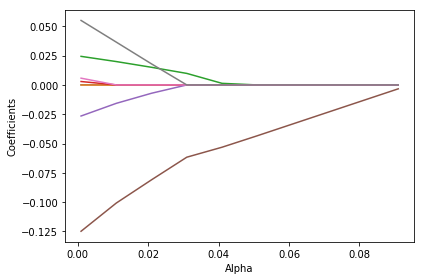

In [450]:
#let alpha = 0.03

max_alpha = 0.1
step = 0.01
coef_ = np.zeros((int(max_alpha/step),8))
k=0
for a in np.arange(0.001,max_alpha,step):
    lr_rg = Lasso(alpha=a)
    lr_rg.fit(X_train, y_train)

    y_train_pred = lr_rg.predict(X_train)
    y_test_pred = lr_rg.predict(X_test)
    coef_[k,:] = lr_rg.coef_.reshape(1,-1)
    k=k+1
print(np.arange(0.001,max_alpha,step))
for i in range(8):
    plt.plot(np.arange(0.001,max_alpha,step),coef_[:,i])
    
plt.ylabel('Coefficients')
plt.xlabel('Alpha')
plt.tight_layout()
plt.show()


[Alpha = 0.000001]
MSE train: 0.2345631

[Alpha = 0.000100]
MSE train: 0.2345635

[Alpha = 0.010000]
MSE train: 0.2351639

[Alpha = 1.000000]
MSE train: 0.2480336


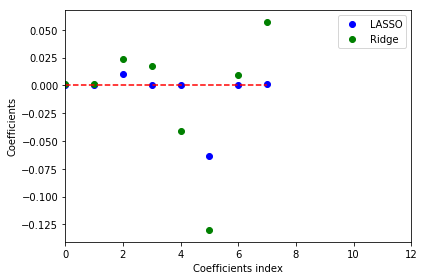

[0.         0.         0.01055929 0.         0.         0.06315792
 0.         0.00114017]
Selected attributes: ['SHOT_CLOCK' 'SHOT_DIST' 'CLOSE_DEF_DIST'] (array([2, 5, 7], dtype=int64),)


In [451]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

for a in [0.000001, 0.0001, 0.01, 1]:
    lr_rg = Lasso(alpha=a)
    lr_rg.fit(X_train, y_train)

    y_train_pred = lr_rg.predict(X_train)
    y_test_pred = lr_rg.predict(X_test)

    print('\n[Alpha = %.6f]' % a )
    print('MSE train: %.7f' % (mean_squared_error(y_train, y_train_pred))) 
var_num = X_train.shape[1]

lr_lasso = Lasso(alpha = 0.03)
lr_lasso.fit(X_train, y_train)
lr_ridge = Ridge(alpha = 1)
lr_ridge.fit(X_train, y_train)

plt.scatter(range(var_num),lr_lasso.coef_, label = 'LASSO', color = 'blue')
plt.scatter(range(var_num),lr_ridge.coef_, label = 'Ridge', color = 'green')
plt.hlines(y=0, xmin=0, xmax=var_num-1, color='red', linestyle ='--')
plt.xlim(0,12)
plt.legend(loc = 'upper right')
plt.xlabel('Coefficients index')
plt.ylabel('Coefficients')
plt.tight_layout()
plt.show()

epsilon = 1e-4
print(abs(lr_lasso.coef_) )
idxs = np.where(abs(lr_lasso.coef_) > epsilon)

print('Selected attributes: {}'.format(X.columns.values[idxs]),idxs)

In [361]:
#Attempt to eliminate the outlier using randsac
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), 
            max_trials=100, 
            min_samples=4000, 
            residual_threshold=0.7, 
            random_state=1)

ransac.fit(X_train[:,idxs[0]], y_train)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

X_train_masked = X_train[inlier_mask]
y_train_masked = y_train[inlier_mask]

print('Train samples eliminated:',sum(outlier_mask),'/',len(X_train))

ransac.fit(X_valid, y_valid)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
X_valid_masked = X_valid[inlier_mask]
y_valid_masked = y_valid[inlier_mask]

print('Valid samples eliminated:',sum(outlier_mask),'/',len(X_valid))

Train samples eliminated: 405 / 36679
Valid samples eliminated: 266 / 15720


2


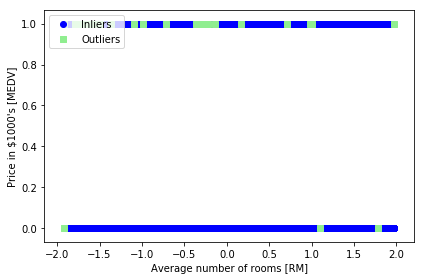

In [296]:
ransac.fit(X_train[:,idxs[0]], y_train)
inlier_mask = ransac.inlier_mask_
print(idxs[0][0])
plt.scatter(X_train[inlier_mask,idxs[0][0]], y_train[inlier_mask],c='blue', marker='o', label='Inliers')
outlier_mask = np.logical_not(inlier_mask)

plt.scatter(X_train[outlier_mask,idxs[0][0]], y_train[outlier_mask
            c='lightgreen', marker='s', label='Outliers')

plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [473]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
poly = PolynomialFeatures(degree= 6)

#forest feature
# 0.62/ 0.49
# X_train_selected = X_train_masked[:,indices[:3]] 

X_train_selected = X_train_masked[:,idxs[0]]

X_trans = poly.fit_transform(X_train_selected)

slr = slr.fit(X_trans, y_train_masked)

print('\n[Ordinary least square]')
y_pred = np.round(slr.predict(X_trans))
print('Train Accuracy: %.3f' % accuracy_score(y_pred, y_train_masked))

X_valid_selected = X_valid_masked[:,idxs[0]]
X_trans = poly.fit_transform(X_valid_selected)

y_pred =np.round(slr.predict(X_trans))
print('Valid Accuracy: %.3f' % accuracy_score(y_pred, y_valid_masked))


[Ordinary least square]
Train Accuracy: 0.623
Valid Accuracy: 0.632


In [464]:
print([slr.predict(X_trans).T ,y_valid_masked[:100].T])


[array([[0.30307393, 0.40152843, 0.49900369, ..., 0.39222824, 0.41454001,
        0.35271936]]),      30069  16671  30654  47872  37165  918    45706  26642  13871  10831  \
FGM      0      1      0      1      1      0      1      0      1      0   

     ...    6206   45019  33460  21366  19771  27657  51553  38939  23295  \
FGM  ...        0      0      0      1      0      1      0      0      1   

     31972  
FGM      0  

[1 rows x 100 columns]]


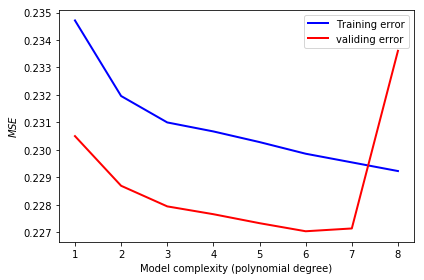

In [306]:
#overfitting when degree = 6
from sklearn.metrics import mean_squared_error

mse_train = []
mse_valid = []
max_degree = 9

for d in range(1, max_degree):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train_selected)
    X_valid_poly = poly.transform(X_valid_selected)
    
    regr = LinearRegression()
    regr = regr.fit(X_train_poly, y_train_masked)
    y_train_pred = regr.predict(X_train_poly)
    y_valid_pred = regr.predict(X_valid_poly)
    
    mse_train.append(mean_squared_error(y_train_masked, y_train_pred))
    mse_valid.append(mean_squared_error(y_valid_masked, y_valid_pred))
    

plt.plot(range(1, max_degree), mse_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), mse_valid, label = 'validing error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$MSE$')
plt.tight_layout()
plt.show()

[ 2418  7859 13300 18741 24182]


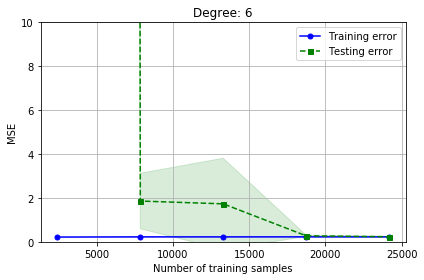

In [478]:
def mse(model, X, y):
    return ((model.predict(X) - y)**2).mean()
from sklearn.learning_curve import learning_curve

degree = [6]
sigma = 1
for d in degree:
    poly = PolynomialFeatures(degree=d)
    X = poly.fit_transform(X_train_selected)

    lr = LinearRegression()
    train_sizes, train_scores, test_scores = learning_curve(estimator=lr, X=X, y=y_train_masked, scoring=mse)
    print(train_sizes)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean,
        color='blue', marker='o',
        markersize=5,
        label='Training error')
    plt.fill_between(train_sizes,
        train_mean+train_std,
        train_mean-train_std,
        alpha=0.15, color='blue')
    
    plt.plot(train_sizes, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='Testing error')
    plt.fill_between(train_sizes,
        test_mean+test_std,
        test_mean-test_std,
        alpha=0.15, color='green')
    
    plt.title('Degree: %d' % d)
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('MSE')
    plt.legend(loc='upper right')
    plt.ylim([0, 10])
    plt.tight_layout()
    plt.show()

In [452]:
from sklearn import svm
clf = svm.LinearSVC(C=0.01)

clf.fit(X_train_selected, y_train_masked)
y_pred = clf.predict(X_train_selected)

print('\nSVM')
# y_pred = np.round(slr.predict(X_trans))

print('Train Accuracy: %.3f' % accuracy_score(y_pred, y_train_masked))

# X_valid_selected = X_valid_masked[:,idxs[0]]
# X_trans = poly.fit_transform(X_valid_selected)

y_pred = clf.predict(X_valid_selected)
print('Valid Accuracy: %.3f' % accuracy_score(y_pred, y_valid_masked))

C:\Users\a1989\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM
Train Accuracy: 0.612
Valid Accuracy: 0.624


In [480]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(X_train_selected, y_train_masked)
y_pred = gbm0.predict(X_train_selected)
print(y_pred)

print('Train Accuracy: %.3f' % accuracy_score(y_pred, y_train_masked))

y_pred = clf.predict(X_valid_selected)
print('Valid Accuracy: %.3f' % accuracy_score(y_pred, y_valid_masked))

C:\Users\a1989\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 0 0 ... 1 1 0]
Train Accuracy: 0.628
Valid Accuracy: 0.624


In [71]:
print(X[20:30])
print(Y[20:30])

    PERIOD  GAME_CLOCK  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  \
20       3         162         6.0         0         0.8       23.7         3   
21       2         269        18.6         0         1.6       25.0         3   
22       1         624        19.8         1         0.7        9.6         2   
23       2         527         9.5         0         0.6        3.4         2   
24       1         358        19.0         0         0.9       23.8         3   
25       1         150        15.8         0         0.9       20.6         2   
26       1         258        15.7         0         0.7        3.0         2   
27       2         444         9.7        19        13.9       10.2         2   
28       4         191        13.2         0         0.7        3.4         2   
29       4         469        12.5         2         3.7        5.3         2   

    CLOSE_DEF_DIST  
20             5.3  
21             6.5  
22             1.9  
23             4.0  
24 